In [1]:
%cd /Users/genevieveberent/Desktop/Zak_Portfolio/house_prices/all

/Users/genevieveberent/Desktop/Zak_Portfolio/house_prices/all


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import
Import both the training and testing data, then combine them to eliminate missing data together and to create dummy variables (this will ensure all dummy variable categories are created for each).

In [3]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')
all_data = pd.concat([training, testing], ignore_index = True)

In [4]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


## Missing Data
First things first, dealing with the missing data.  

In [5]:
#Find how much missind data there is.
mis_val_percent = (100 * all_data.isnull().sum() / len(all_data)).sort_values(ascending = False)
print(mis_val_percent[mis_val_percent > 0])

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Electrical       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
Exterior1st      0.034258
GarageCars       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
dtype: float64


In [6]:
#With such a large percentage missing from some columns, I am going to drop the top 5 columns.
#Be careful, SalePrice is missing so much due to the fact that the test set does not include the SalePrice
all_data = all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

## Filling Missing Data

In [7]:
#LotFrontage
#It seems common that lots are all fairly similar in each neighborhood.  
#Fill all the missing data with the mean of the LotFrontage of the neighborhood the house is in

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [8]:
#NA for Garage info means there is no garage, replace 'NA' with 'None'
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')

In [9]:
#Similar to garage info, 'NA' for basement columns, represents 'No Basement'
#For Basement Bath info, filling with 0
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [10]:
#'NA' for Masonry will be filled with 'None' while the area, since none, will be filled with 0.
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [11]:
#MSZoning will be filled with the most common MSZoning in the neighborhood of the missing values.
all_data['MSZoning'].value_counts().sort_values(ascending = False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [12]:
all_data[all_data['MSZoning'].isnull()]['Neighborhood']

1915     IDOTRR
2216     IDOTRR
2250     IDOTRR
2904    Mitchel
Name: Neighborhood, dtype: object

In [13]:
all_data[all_data['Neighborhood'] == 'IDOTRR']['MSZoning'].value_counts().sort_values(ascending = False)

RM         68
C (all)    22
Name: MSZoning, dtype: int64

In [14]:
all_data[all_data['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts().sort_values(ascending = False)

RL    104
RM      9
Name: MSZoning, dtype: int64

In [15]:
all_data.loc[all_data['Neighborhood'] == 'IDOTRR', 'MSZoning'] = all_data.loc[all_data['Neighborhood'] == 'IDOTRR', 'MSZoning'].fillna('RM')
all_data.loc[all_data['Neighborhood'] == 'Mitchel', 'MSZoning'] = all_data.loc[all_data['Neighborhood'] == 'Mitchel', 'MSZoning'].fillna('RL')

In [16]:
#That took way longer than it should have for 4 missing values, but the lesson learned was great!

In [17]:
#Utilities
all_data['Utilities'].value_counts().sort_values(ascending = False)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
#All but one case are 'AllPub', going to stick with the trend
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')

In [19]:
#Functional, data description states assume normal unless otherwise stated
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [20]:
#Electrical, the vast majority are 'SBrkr'
all_data['Electrical'].value_counts().sort_values(ascending = False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [21]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

In [22]:
#Exterior1st and Exterior2nd
#The null values for Exterior1st and Exterior2nd are the same observation
all_data[all_data['Exterior1st'].isnull()][['Exterior2nd', 'Neighborhood']]

,Exterior2nd,Neighborhood
2151,NaN,Edwards


In [23]:
all_data[all_data['Neighborhood'] == 'Edwards']['Exterior1st'].value_counts().sort_values(ascending= False)

Wd Sdng    45
VinylSd    38
MetalSd    37
HdBoard    21
Plywood    16
WdShing    13
AsbShng     7
Stucco      6
BrkFace     4
CemntBd     3
BrkComm     2
AsphShn     1
Name: Exterior1st, dtype: int64

In [24]:
all_data[all_data['Neighborhood'] == 'Edwards']['Exterior2nd'].value_counts().sort_values(ascending= False)

Wd Sdng    48
VinylSd    38
MetalSd    35
Plywood    30
HdBoard    15
Wd Shng    10
Stucco      7
AsbShng     4
CmentBd     3
Brk Cmn     2
AsphShn     1
Name: Exterior2nd, dtype: int64

In [25]:
#Houses in the same neighbor tend to be built pretty similar.
#The null value comes from the Edwards neighborhood where 'Wd Sdng' is the most popular
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('Wd Sdng')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('Wd Sdng')

In [26]:
#KitchenQual is only missing one observation as well, fill with the most popular
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [27]:
#GarageCars
#Upon looking at the null observation, the GarageArea is also null
#No garage means no cars
all_data[all_data['GarageCars'].isnull()]['GarageArea']

2576   NaN
Name: GarageArea, dtype: float64

In [28]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [29]:
#Taking a look at the remaining missing basement data
all_data[all_data['BsmtFinSF1'].isnull()][['BsmtUnfSF', 'BsmtFinSF2', 'TotalBsmtSF']]

,BsmtUnfSF,BsmtFinSF2,TotalBsmtSF
2120,NaN,NaN,NaN


In [30]:
#With all the basement columns null, there is no basement
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

In [31]:
#SaleType
all_data['SaleType'].value_counts().sort_values(ascending = False).head(3)

WD     2525
New     239
COD      87
Name: SaleType, dtype: int64

In [32]:
#WD is by far the most popular 'SaleType'
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [33]:
#GarageYrBlt is throwing me for a loop, this most likely means that there isn't a garage.
#Since the data is a year, inputting 0 would skew this data very much and could lead to 
#correlations not being accurate
## Filling null values with same year the house was built.
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

In [34]:
## Double Check that there is no more missing values
## The SalePrice is due to the test set not having that column
mis_val_percent = (100 * all_data.isnull().sum() / len(all_data)).sort_values(ascending = False)
print(mis_val_percent[mis_val_percent > 0])

SalePrice    49.982871
dtype: float64


# Dummy Variables
With so many variables that are categorical, we need to create dummy variables to be able to represent them numerically.

In [35]:
all_data = pd.get_dummies(all_data)

In [36]:
print('Size Before Dummy Variables (Just training): ', training.shape)
print('Size After Dummy Variables: ', all_data.shape)

Size Before Dummy Variables (Just training):  (1460, 81)
Size After Dummy Variables:  (2919, 281)


There went from 81 columns to 281 columns.

# Train and Test Set
Now that all the missing data is taken care of and the the number of columns is same (due to the dummy variables), we need to split the data back into the training and testing data.  We can do this because we know that the test set does not have the 'SalePrice' column.

In [37]:
training = all_data.loc[all_data['SalePrice'].notnull()]
testing = all_data.loc[all_data['SalePrice'].isnull()]

# Dependent Variable
We have the assumption that the dependent variable is normally distributed.  If this is not the case, a data transformation will be needed.  There are multiple ways that we can check the normality of the dependent variable.

In [38]:
# A skew of 0 represents a normal distribution.
# 'SalePrice' has a positive skew, shown by the skew > 0.
training['SalePrice'].skew()

1.8828757597682129

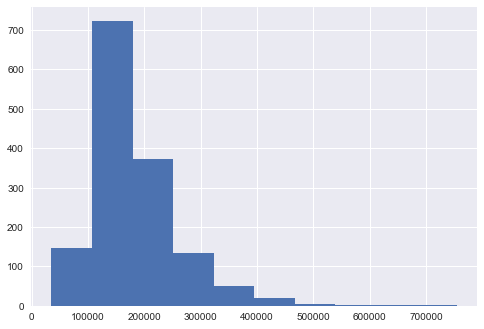

In [39]:
#Visually we can see the positive skew by the tail on the right of the histogram
plt.hist(training['SalePrice'])
plt.show()

In [40]:
#Check normality of the dependent variable
#Base on the p-value (less than 0.05), we can assume the data is not normally distributed
scipy.stats.shapiro(training['SalePrice'])

(0.869671642780304, 3.206247534576162e-33)

In [41]:
#A transformation should be done on the 'SalePrice' to attempt to bring it closer to noraml
#Some methods for a positive skew are square root, cube root and log transformations.

SalePrice_sqrt = training['SalePrice'] ** (1/2)
SalePrice_cubert = training['SalePrice'] ** (1/3)
SalePrice_log = np.log(training['SalePrice'])

print('The skew of the square root is', SalePrice_sqrt.skew())
print('The skew of the cube root is', SalePrice_cubert.skew())
print('The skew of the log is', SalePrice_log.skew())

The skew of the square root is 0.943152737331
The skew of the cube root is 0.66676764644
The skew of the log is 0.121335062205


In [42]:
#All the transformations increased the normality, 
#however the log transformation is the closest to 0
training['SalePrice(log)'] = SalePrice_log

/Users/genevieveberent/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


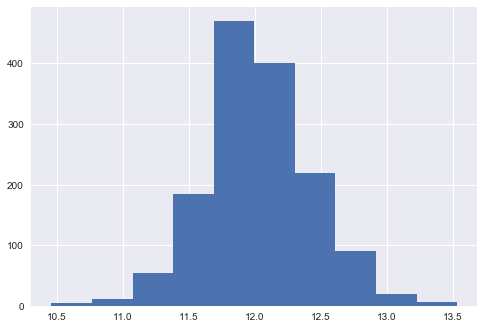

In [43]:
#The distribution of the log transformation
plt.hist(training['SalePrice(log)'])
plt.show()

# Predict with a Lasso Regression Model

In [44]:
from sklearn.linear_model import Lasso

In [45]:
#Set the training independent and dependent variables
train_x = training.drop(['SalePrice', 'SalePrice(log)'], axis = 1)
train_y = training['SalePrice(log)']

In [63]:
testing = testing.drop('Predictions', axis = 1)

In [64]:
lasso = Lasso(alpha = .0001, normalize = True)
lasso.fit(train_x, train_y)
lasso_coef = lasso.coef_
print(lasso_coef)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.13240225e-05   0.00000000e+00   2.47946991e-02   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   2.55665678e-02   9.46502249e-03
   9.90056217e-05   2.96728639e-02   0.00000000e+00   2.41346512e-04
   8.26225981e-03  -0.00000000e+00  -3.21175647e-02   1.39590344e-06
   3.16492566e-04  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   2.21492725e-05   3.25265975e-02
   5.73090665e-02   0.00000000e+00   1.79048078e-04   2.12707262e-03
   9.19069905e-05   7.57678955e-05   1.42494199e-03   8.87553757e-04
  -0.00000000e+00   2.71236126e-02   0.00000000e+00  -0.00000000e+00
  -3.62391076e-02  -0.00000000e+00  -1.34915097e-02   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.57644209e-02   0.00000000e+00  -8.26158280e-03  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   8.80947013e-03  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00

In [65]:
predictions = lasso.predict(testing)

In [66]:
predictions

array([ 11.72210642,  11.93747037,  12.08002036, ...,  12.02170941,
        11.67371136,  12.33471788])

In [67]:
testing['Predictions'] = np.e ** predictions

In [68]:
prediction_df = testing[['Id', 'Predictions']]
prediction_df.columns = ['Id', 'SalePrice']

In [69]:
prediction_df.head()

,Id,SalePrice
1460,1461,123266.804175
1461,1462,152889.446385
1462,1463,176313.749991
1463,1464,196274.997850
1464,1465,196854.612383


In [70]:
prediction_df.to_csv('Housing_Predictions_7.csv', index=False)